# Analyzing FIFA World Cup Data(Part 2)

## Introduction
This project provides an analysys for data set of the FIFA World Cup. As it has a big history and mega huge amount of history I decided to work with this data set. The FIFA World Cup is the premier international soccer competition. The World Cup is held by the governing body of world football - FIFA, and the men's national teams of the FIFA member countries of all continents can participate in it.The final tournaments of the world championships are held every 4 years. Why I have interested on it? 
Main reason for that is by analysing this data set I want to make a prediction to winner of further competition. For that I am planning to consider main factors including the population of the country, the international ranking of the team, the average age of the players, the number of players who have played in the UEFA Champions League, the nationality of the coach and an incredible number of other variables are taken into account.


## Objectives
1. To evaluate the development process of national football teams across continents over different periods of time
2. Focus on the personal statistics of the players in the championship and draw up several rating charts for national teams and players
3. As a result of the analysis, make a forecast for the winner and the owners of the remaining prizes


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

dr=pd.read_csv("WorldCupMatches.csv")
dr

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Corrections after part 1 recommendations

In the first part I did not used data description. So, on my further works, for answering to my research questions I will use data description and data cleaning and remain only data that I need from tables 

In [9]:
dr.dropna()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


## Research questions
1. Which national teams are considered to be fovarites of the world championship according to their goals?
2. Are there differences between the data of the world championships of the 20th and 21st century?
3. How does the attendence of people has changed by development of World Cup?
4. What were the main changes in the formats or rules of the tournament over the years?
5. Are there any differences between progress of developed and developing countries according to their data?

### Research question 1

#### Which national teams are considered to be fovarites of the World Cup according to their goals?

This research question is identifying Top participants of World Cup by their goals scored at several matches.Firstly, I realized that on my table there are data about goals that was scored at home and away by national teams. 
So, I need to sum this two values in order to find total goals of national teams.It means that from the table I need 4 columns: "Home Team Name", "Home Team Goals", "Away Team Name", "Away Team Goals". 


In [70]:
scoredathome = dr.groupby('Home Team Name')['Home Team Goals'].sum().reset_index() ## counts how many goals have been scored by home teams
scoredathome.columns = ['country','home_goal'] ## divide it by columns 
scoredataway = dr.groupby('Away Team Name')['Away Team Goals'].sum().reset_index() ## counts how many goals have been scored by away teams
scoredataway.columns = ['country','away_goal'] ## divide it by columns
homeandaway = pd.merge(scoredathome,scoredataway,on='country') ## we bring goals scored at home and away
homeandaway ['Total goals scored'] = homeandaway ['home_goal'] + homeandaway ['away_goal'] ## we need to sum goals to find total goals
homeandaway = homeandaway.sort_values(by='Total goals scored', ascending=False) ## I used this code to sort data by descending order

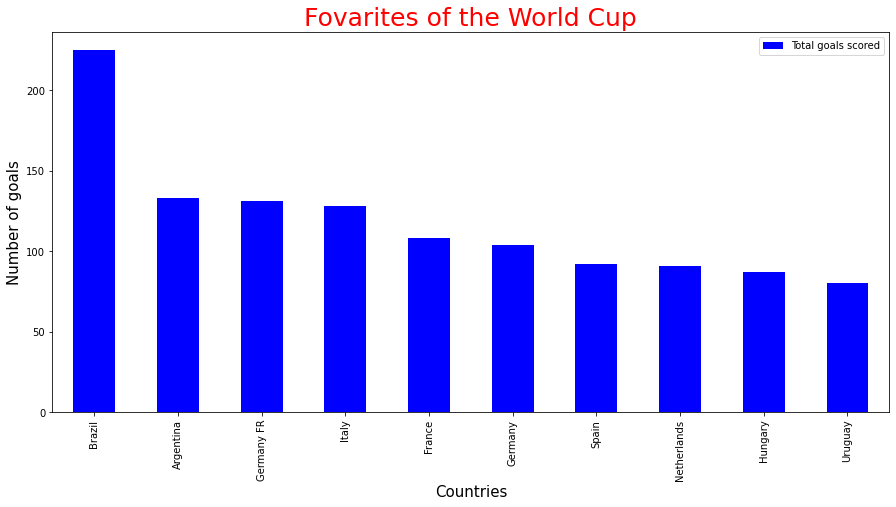

In [96]:

homeandaway[:10].plot(kind='bar',y='Total goals scored',x='country',figsize=(15,7),color='b') ## I chose type of chart as barchart and take only 10 country which considered to be fovarites
plt.xlabel('Countries',size='15') ## Label X axis as Countries
plt.ylabel('Number of goals',size='15') ## Label Y axis as Nuber of goals
plt.title('Fovarites of the World Cup',color='r',size='25') ## Title of my barchart and as usual used red color to title 
plt.show()

## Findings and comments to RQ1:

According to barchart following national teams are considered to be favorites of World Cup: Brazil,Argentina,Germany,Italy,France,Spain,Netherlands,Hungary and Uruguay. Brazil have won World Cup 5 times and footbal appeared in this country, that is why Brazil on the first place.Also, we can see big fluctuation after Brazil and gradualy decreases from Argentina to Uruguay.Next interesting thing that I found that only South American and European countries are considered to be favorites.

I have found one thing to consider from this barchart. On the the table goals scored by Germany national team and Germany FR are given sepately. I thought it is because of some historical changes of Germany. So, It will be better to sum data of Germany FR and Germany.



### Research question 3

#### How does the attendance of people has changed by development of World Cup?
So, this question is about number of fans who attend the matches. Firstly, I had to find average number of fans who attended the matches by the year. So, on my dataset it shows number of attended fans of every football match by the year. That is why I found mean attendance and marked it on "Y" axis and respectively year on "X" axis. I already did data preparation part for this question by dropping NaN values from table. I need only two columns from the table, there are "Year" and "Attendance" columns.

In [112]:
q3  = dr.groupby("Year")["Attendance"].mean().reset_index() ## data preparation using groupby Year and mean of Attendance 

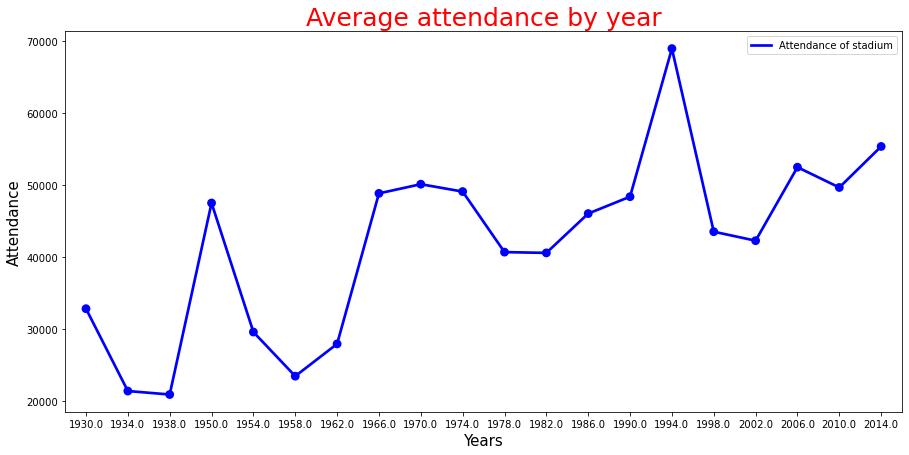

In [113]:
plt.figure(figsize=(15,7)) ## I used figsize 15,7 as standard for all my charts
ax = sns.pointplot(q3["Year"],q3["Attendance"],color="b") ## using seaborn i plotted Year and Attendence graph  
ax.set_xlabel('Years',size='15') ## label x axis as Years
plt.legend(["Attendance of stadium"])
ax.set_ylabel('Attendance',size='15')## label y axis as Attendance
plt.title("Average attendance by year",color='r',size='25') ## Title of graph is Average attendance by year
plt.show()

## Findings and comments to RQ3:
On the Figure above we can see attendance of the stadium over the period 1930 to 2014. World Cup is held every 4 year,but after 1938 because of World War it stopped and started again only in 1950. That is why there is no data for that period.
The most attendance is seen on 1994. In 1994 the number of participant increased and reached to 24. Also, it held in America. That is the reason why in 1994 people attended stadiums more.
The most unattended World Championship was held in 1938. In this year number of participants was only 15 and this Championship was the last before the Second World War. 
In general, we cannot say that the schedule is gradually increasing or decreasing, attendance changes in each championship because of different factors.